In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
wine_test = pd.read_csv('./WineTEST', header=None)
wine_train = pd.read_csv('./WineTRAIN', header=None)

## EDA

In [3]:
wine_train.head()

,0,1,2,3,4,5,6,7,8,9,...,225,226,227,228,229,230,231,232,233,234
0,1,1.7816,1.6417,1.5139,1.3944,1.2820,1.1747,1.0705,0.97042,0.87394,...,-1.6702,-1.7096,-1.7449,-1.7830,-1.8106,-1.8373,-1.8609,-1.8804,-1.9012,-1.9189
1,1,1.7797,1.6389,1.5120,1.3920,1.2778,1.1704,1.0667,0.96700,0.87141,...,-1.6706,-1.7104,-1.7458,-1.7834,-1.8110,-1.8377,-1.8613,-1.8808,-1.9016,-1.9193
2,1,1.7765,1.6363,1.5083,1.3885,1.2755,1.1666,1.0635,0.96505,0.86839,...,-1.6739,-1.7139,-1.7488,-1.7865,-1.8142,-1.8409,-1.8645,-1.8841,-1.9045,-1.9226
3,1,1.7741,1.6351,1.5079,1.3887,1.2772,1.1716,1.0668,0.96652,0.87209,...,-1.6563,-1.6954,-1.7309,-1.7691,-1.7966,-1.8231,-1.8465,-1.8658,-1.8869,-1.9049
4,1,1.7765,1.6377,1.5109,1.3923,1.2791,1.1726,1.0692,0.97037,0.87466,...,-1.6552,-1.6947,-1.7302,-1.7684,-1.7958,-1.8219,-1.8448,-1.8646,-1.8857,-1.9037


In [4]:
wine_test.head()

,0,1,2,3,4,5,6,7,8,9,...,225,226,227,228,229,230,231,232,233,234
0,1,1.7672,1.6248,1.4978,1.3799,1.2674,1.1595,1.0560,0.95627,0.85922,...,-1.6742,-1.7137,-1.7486,-1.7867,-1.8143,-1.8407,-1.8638,-1.8828,-1.9037,-1.9214
1,1,1.7710,1.6295,1.5011,1.3835,1.2706,1.1612,1.0582,0.95843,0.86224,...,-1.6749,-1.7143,-1.7493,-1.7869,-1.8146,-1.8414,-1.8645,-1.8840,-1.9049,-1.9221
2,1,1.7694,1.6279,1.4991,1.3816,1.2691,1.1616,1.0581,0.95878,0.86306,...,-1.6742,-1.7137,-1.7486,-1.7867,-1.8144,-1.8407,-1.8638,-1.8833,-1.9037,-1.9219
3,1,1.7453,1.6071,1.4807,1.3635,1.2540,1.1494,1.0489,0.95186,0.85799,...,-1.6496,-1.6885,-1.7229,-1.7600,-1.7869,-1.8132,-1.8365,-1.8552,-1.8758,-1.8932
4,1,1.7445,1.6060,1.4795,1.3638,1.2556,1.1506,1.0482,0.94947,0.85696,...,-1.6489,-1.6873,-1.7222,-1.7597,-1.7865,-1.8129,-1.8357,-1.8549,-1.8755,-1.8929


In [5]:
y_train = wine_train.iloc[:, 0].values
X_train = wine_train.iloc[:, 1:].values

y_test = wine_test.iloc[:, 0].values
X_test = wine_test.iloc[:, 1:].values

In [6]:
classes = np.unique(y_train)
n_classes = len(classes)
n_time_steps = X_train.shape[1]

print(f"\nИнформация о датасете wine:")
print(f"Количество классов: {n_classes}")
print(f"Классы: {classes}")
print(f"Количество временных меток: {n_time_steps}")


Информация о датасете wine:
Количество классов: 2
Классы: [1 2]
Количество временных меток: 234


In [7]:
train_class_dist = pd.Series(y_train).value_counts().sort_index()
test_class_dist = pd.Series(y_test).value_counts().sort_index()

In [8]:
# Распределение классов в тренировочной выборке
for cls, count in train_class_dist.items():
    print(f"Класс {cls}: {count} значений")

Класс 1: 30 значений
Класс 2: 27 значений


In [9]:
# Распределение классов в тестовой выборке
for cls, count in test_class_dist.items():
    print(f"Класс {cls}: {count} значений")

Класс 1: 27 значений
Класс 2: 27 значений


In [10]:
# Статистика по данным
print(f"Avg: {X_train.mean():.4f}")
print(f"Std: {X_train.std():.4f}")
print(f"Min: {X_train.min():.4f}")
print(f"Max: {X_train.max():.4f}")


Avg: 0.0000
Std: 0.9979
Min: -1.9425
Max: 3.2006


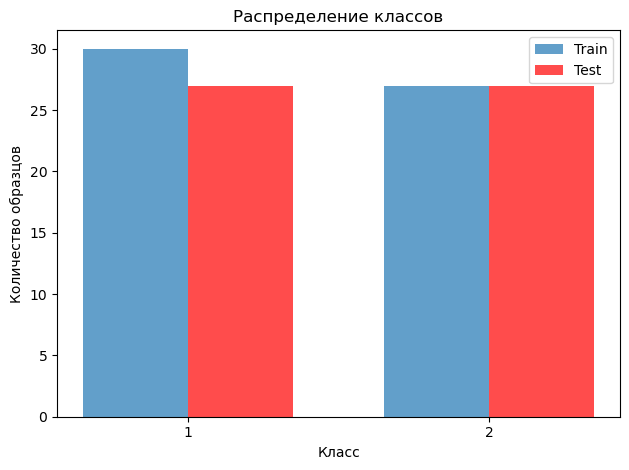

In [11]:
indices = np.arange(len(train_class_dist))

# Ширина столбцов
width = 0.35

# Рисуем столбцы с смещением
plt.bar(indices - width/2, train_class_dist.values, width=width, alpha=0.7, label='Train')
plt.bar(indices + width/2, test_class_dist.values, width=width,color='red', alpha=0.7, label='Test')

plt.title('Распределение классов')
plt.xlabel('Класс')
plt.ylabel('Количество образцов')
plt.xticks(indices, train_class_dist.index)
plt.legend()
plt.tight_layout()


Text(0, 0.5, 'Значение')

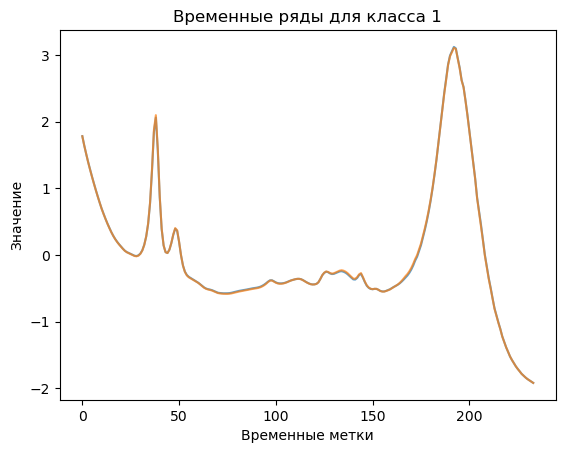

In [12]:
cls_indices = np.where(y_train == 1)[0][:2]
for idx in cls_indices:
    plt.plot(X_train[idx], alpha=0.7)

plt.title('Временные ряды для класса 1')
plt.xlabel('Временные метки')
plt.ylabel('Значение')

Text(0, 0.5, 'Значение')

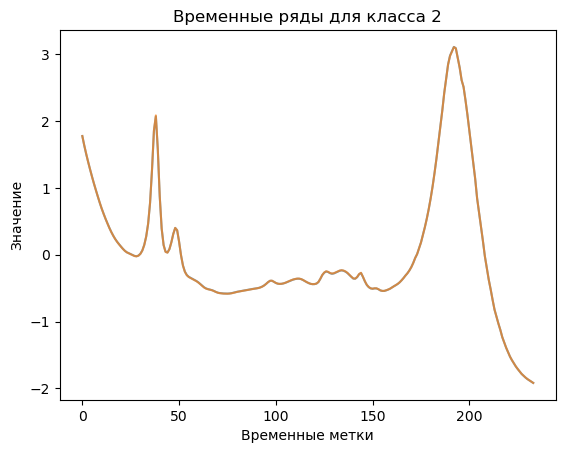

In [13]:
cls_indices = np.where(y_train == 2)[0][:2]
for idx in cls_indices:
    plt.plot(X_train[idx], alpha=0.7)

plt.title('Временные ряды для класса 2')
plt.xlabel('Временные метки')
plt.ylabel('Значение')

Text(0, 0.5, 'Частота')

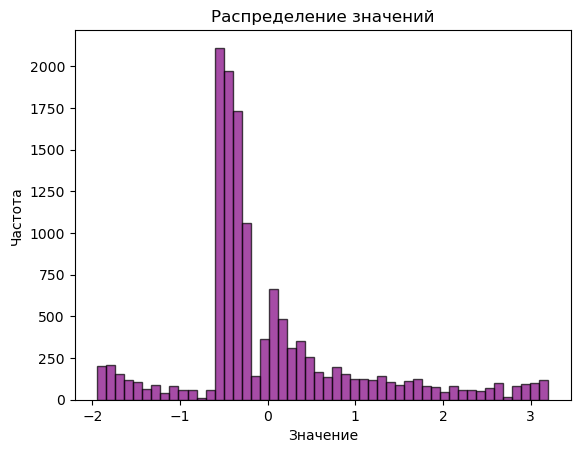

In [14]:
# Гистограмма значений
all_values = X_train.flatten()
plt.hist(all_values, bins=50, alpha=0.7, color='purple', edgecolor='black')
plt.title('Распределение значений')
plt.xlabel('Значение')
plt.ylabel('Частота')


Text(0, 0.5, 'Значение')

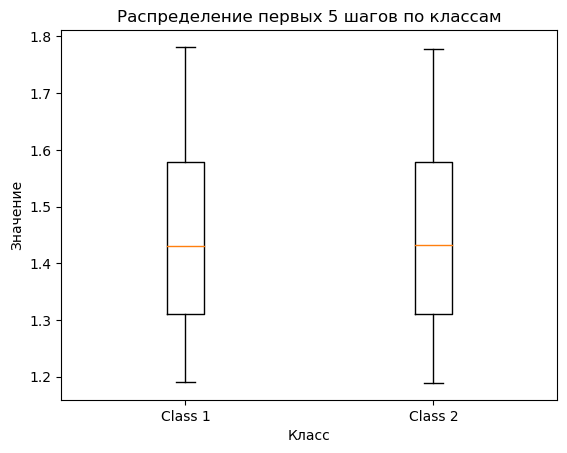

In [15]:
boxplot_data = []
labels = []
for cls in classes:
    cls_data = X_train[y_train == cls][:, :5]
    boxplot_data.append(cls_data.flatten())
    labels.append(f'Class {cls}')
    
plt.boxplot(boxplot_data, labels=labels)
plt.title('Распределение первых 5 шагов по классам')
plt.xlabel('Класс')
plt.ylabel('Значение')

In [16]:
print(f"Пропущенные значения в тренировочных данных: {np.isnan(X_train).sum()}")
print(f"Пропущенные значения в тестовых данных: {np.isnan(X_test).sum()}")


Пропущенные значения в тренировочных данных: 0
Пропущенные значения в тестовых данных: 0


In [25]:
# Нормализуем каждый временной ряд отдельно
def normalize_series(data):
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data.T).T
    return normalized_data

X_train_norm = normalize_series(X_train)
X_test_norm = normalize_series(X_test)


print(f"Тренировочные данные: min={X_train_norm.min():.4f}, max={X_train_norm.max():.4f}")
print(f"Тестовые данные: min={X_test_norm.min():.4f}, max={X_test_norm.max():.4f}")

Тренировочные данные: min=-1.9467, max=3.2075
Тестовые данные: min=-1.9262, max=3.1993


In [26]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):

    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(kernel='rbf', random_state=42, probability=True),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, multi_class='ovr')
    }
    
    results = {}
    
    for name, model in models.items():
        print(f"\n{name}")
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

        accuracy = accuracy_score(y_test, y_pred)
    
        results[name] = {
            'accuracy': accuracy,
            'model': model,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        }
        
        print(f"Accuracy: {accuracy}")
         
    return results


In [27]:
results = train_and_evaluate_models(X_train_norm, X_test_norm, y_train, y_test)



Random Forest
Accuracy: 0.7407407407407407

SVM
Accuracy: 0.5

KNN
Accuracy: 0.5370370370370371

Logistic Regression
Accuracy: 0.48148148148148145


In [28]:
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]

In [29]:
print(classification_report(y_test, best_model['y_pred'], target_names=[str(c) for c in classes]))

              precision    recall  f1-score   support

           1       0.71      0.81      0.76        27
           2       0.78      0.67      0.72        27

    accuracy                           0.74        54
   macro avg       0.75      0.74      0.74        54
weighted avg       0.75      0.74      0.74        54



In [30]:
cm = confusion_matrix(y_test, best_model['y_pred'])
cm

array([[22,  5],
       [ 9, 18]])

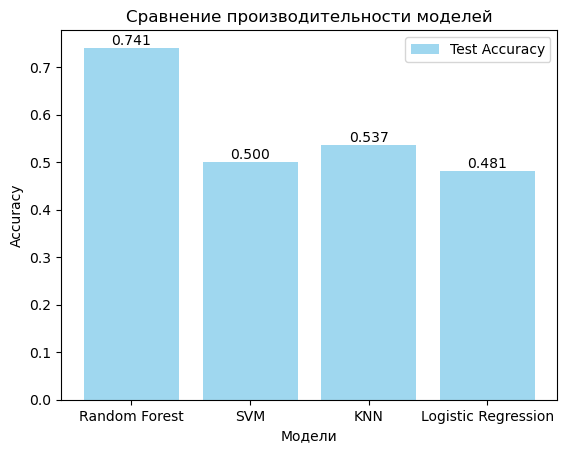

In [31]:
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

x = np.arange(len(model_names))
bars = plt.bar(x, accuracies,label='Test Accuracy', color='skyblue', alpha=0.8)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
        f'{height:.3f}', ha='center', va='bottom')

plt.xlabel('Модели')
plt.ylabel('Accuracy')
plt.title('Сравнение производительности моделей')
plt.xticks(x, labels=model_names)
plt.legend()

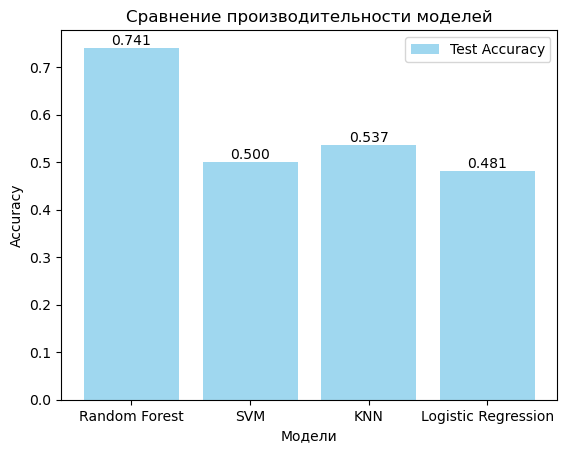

In [32]:
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

x = np.arange(len(model_names))
bars = plt.bar(x, accuracies,label='Test Accuracy', color='skyblue', alpha=0.8)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
        f'{height:.3f}', ha='center', va='bottom')

plt.xlabel('Модели')
plt.ylabel('Accuracy')
plt.title('Сравнение производительности моделей')
plt.xticks(x, labels=model_names)
plt.legend()